In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 

In [61]:
data = pd.read_csv(r'C:\Users\hashemi\Desktop\Term6\HW3\heart.csv')
data = data.drop('Unnamed: 0', axis=1)
feature_cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [63]:
print(data.shape)
print(data.head())
data.describe()

(303, 14)
   age     sex      cp  trestbps  chol    fbs  restecg  thalach exang  \
0   63    male  severe       145   233   True        0      150    no   
1   37    male  medium       130   250  False        1      187    no   
2   41  female    weak       130   204  False        0      172    no   
3   56    male    weak       120   236  False        1      178    no   
4   57  female    none       120   354  False        1      163   yes   

   oldpeak  slope  ca          thal target  
0      2.3      0   0        normal    yes  
1      3.5      0   0  fixed_defect    yes  
2      1.4      2   0  fixed_defect    yes  
3      0.8      2   0  fixed_defect    yes  
4      0.6      2   0  fixed_defect    yes  


,age,trestbps,chol,restecg,thalach,oldpeak,slope,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,0.528053,149.646865,1.039604,1.399340,0.729373
std,9.082101,17.538143,51.830751,0.525860,22.905161,1.161075,0.616226,1.022606
min,29.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,0.000000,133.500000,0.000000,1.000000,0.000000
50%,55.000000,130.000000,240.000000,1.000000,153.000000,0.800000,1.000000,0.000000
75%,61.000000,140.000000,274.500000,1.000000,166.000000,1.600000,2.000000,1.000000
max,77.000000,200.000000,564.000000,2.000000,202.000000,6.200000,2.000000,4.000000


In [64]:
#convert numerical features to categories
for i in range(len(data)):
    data.at[i,'age'] = data.age[i] // 10**1 % 10 #Age
    
    data.at[i, 'chol'] = data.chol[i] // 10**2 % 10 #Chol
    
    if(data.at[i, 'trestbps'] < 120):#trestbps
        data.at[i, 'trestbps'] = 0
    elif(data.at[i, 'trestbps'] < 140):
        data.at[i, 'trestbps'] = 1
    else:
        data.at[i, 'trestbps'] = 2
    
    if(data.at[i, 'oldpeak'] < 0.5):#oldpeak
        data.at[i, 'oldpeak'] = 0
    elif(data.at[i, 'oldpeak'] < 1.5):
        data.at[i, 'oldpeak'] = 1
    elif(data.at[i, 'oldpeak'] < 3):
        data.at[i, 'oldpeak'] = 2
    else:
        data.at[i, 'oldpeak'] = 3
        
        
    if(data.at[i, 'thalach'] < 120):#thalach
        data.at[i, 'thalach'] = 0
    elif(data.at[i, 'thalach'] < 150):
        data.at[i, 'thalach'] = 1
    elif(data.at[i, 'thalach'] < 180):
        data.at[i, 'thalach'] = 2
    else:
        data.at[i, 'thalach'] = 3

In [66]:
#encode non-numerical values with digits
for i in range(len(data)):
    if(data.at[i,'sex'] == 'male'):#sex
        data.at[i,'sex'] = 0
    elif(data.at[i,'sex'] == 'female'):
        data.at[i,'sex'] = 1
    
    if(data.at[i,'cp'] == 'none'):#cp
        data.at[i,'cp'] = 0
    elif(data.at[i,'cp'] == 'weak'):
        data.at[i,'cp'] = 1
    elif(data.at[i,'cp'] == 'medium'):
        data.at[i,'cp'] = 2
    elif(data.at[i,'cp'] == 'severe'):
        data.at[i,'cp'] = 3
        
    data['fbs'] = data['fbs']*1#fbs
        
    if(data.at[i,'exang'] == 'no'):#exang
        data.at[i,'exang'] = 0
    elif(data.at[i,'exang'] == 'yes'):
        data.at[i,'exang'] = 1


    if(data.at[i,'thal'] == 'normal'):#thal
        data.at[i,'thal'] = 0
    elif(data.at[i,'thal'] == 'fixed_defect'):
        data.at[i,'thal'] = 1
    elif(data.at[i,'thal'] == 'eversable_defect'):
        data.at[i,'thal'] = 2
        
        
        
    if(data.at[i,'target'] == 'no'):#target
        data.at[i,'target'] = 0
    elif(data.at[i,'target'] == 'yes'):
        data.at[i,'target'] = 1

In [8]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,6,0,3,2,2,1,0,2,0,2.0,0,0,0,1
1,3,0,2,1,2,0,1,3,0,3.0,0,0,1,1
2,4,1,1,1,2,0,0,2,0,1.0,2,0,1,1
3,5,0,1,1,2,0,1,2,0,1.0,2,0,1,1
4,5,1,0,1,3,0,1,2,1,1.0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,5,1,0,2,2,0,1,1,1,0.0,1,0,2,0
299,4,0,3,0,2,0,1,1,0,1.0,1,0,2,0
300,6,0,0,2,1,1,1,1,0,3.0,1,2,2,0
301,5,0,0,1,1,0,1,0,1,1.0,1,1,2,0


In [67]:
X = data.drop('target', axis=1) #Features
y = data['target'] #Target
y = y.astype('int')

In [68]:
#Spliting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [69]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=5, min_samples_split=2, random_state=0)

#Training Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predicting the response for test dataset
y_pred = clf.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[19 11]
 [12 19]]
              precision    recall  f1-score   support

           0       0.61      0.63      0.62        30
           1       0.63      0.61      0.62        31

    accuracy                           0.62        61
   macro avg       0.62      0.62      0.62        61
weighted avg       0.62      0.62      0.62        61



In [58]:
!pip install graphviz
!pip install pydot

In [71]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

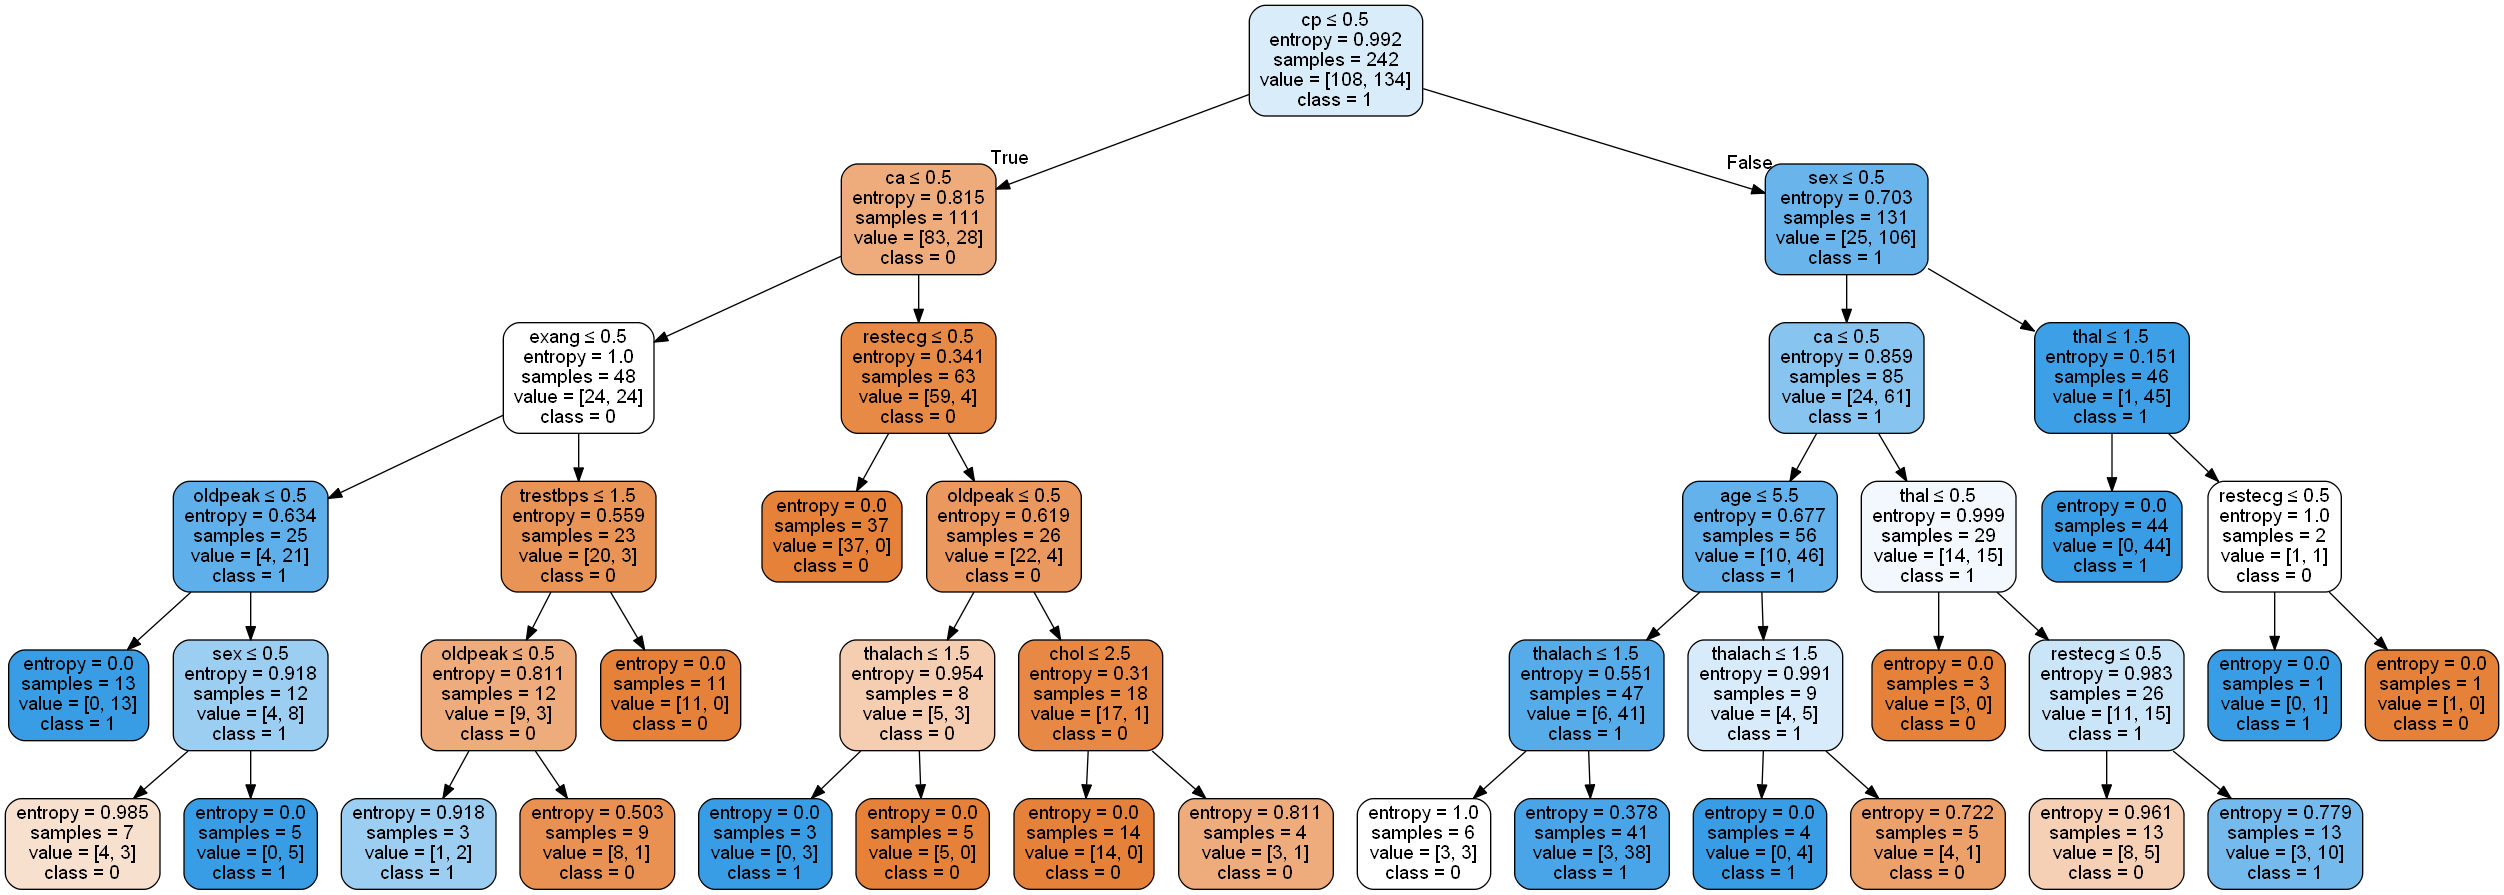

In [72]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('heart.png')
Image(graph.create_png())